In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

#데이터 분할:train,test
from sklearn.model_selection import train_test_split

#회귀분석
import statsmodels.formula.api as smf
#Decision tree
from sklearn.tree import DecisionTreeRegressor
#Random Forest
from sklearn.ensemble import RandomForestRegressor
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor


#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
#한글 폰트 적용
matplotlib.rc("font",family="NanumGothic")

In [3]:
#한글 폰트 임포트
import matplotlib.font_manager as fm
matplotlib.font_manager._rebuild()
[f.name for f in matplotlib.font_manager.fontManager.ttflist]

['cmsy10',
 'STIXGeneral',
 'DejaVu Serif Display',
 'STIXSizeTwoSym',
 'cmex10',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmtt10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmmi10',
 'cmb10',
 'STIXGeneral',
 'cmss10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'DejaVu Sans Display',
 'cmr10',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'Liberation Sans',
 'LKLUG',
 'Liberation Mono',
 'DejaVu Sans',
 'Pothana2000',
 'Tlwg Mono',
 'Loma',
 'Ani',
 'DejaVu Math TeX Gyre',
 'Noto Mono',
 'Ubuntu Mono',
 'Karumbi',
 'Ubuntu',
 'Liberation Sans',
 'Droid Sans Fallback',
 'FreeMono',
 'Liberation Mono',
 'Dyuthi',
 'KacstScreen',
 'KacstQurn',
 'Liberation Serif',
 'Kalimati',

In [4]:
#사이킷런에서 제공되지 않는 rmse,mape 평가함수 정의하기
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/(y_true)))

In [5]:
df_raw = pd.read_csv('BOSTON_HOUSING.csv', encoding='cp949')
df_raw.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [6]:
#목표변수, 설명변수 데이터 지정
df_raw_y=df_raw["MEDV"]
df_raw_x=df_raw.drop("MEDV",axis=1,inplace=False)

In [7]:
#train 데이터와 test 데이터를 7:3 비율로 분할)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(354, 13)
train data Y size:(354,)
test data X size:(152, 13)
test data Y size:(152,)


In [8]:
#모델 생성
lr_model = smf.ols(formula ="MEDV~ CRIM+ ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT",data=df_raw)
lr_result=lr_model.fit()
print(lr_result.summary())

dt_model = DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20,max_depth=4)
dt_model.fit(df_train_x,df_train_y)

rf_model = RandomForestRegressor(random_state=1234,n_estimators=100,min_samples_leaf=6,
                                 min_samples_split=14,max_depth=4)
rf_model.fit(df_train_x,df_train_y)

gb_model = GradientBoostingRegressor(random_state=1234,n_estimators=30,min_samples_leaf=11,
                                 min_samples_split=22,max_depth=4, learning_rate=0.1)
gb_model.fit(df_train_x,df_train_y)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     137.5
Date:                Wed, 15 Jul 2020   Prob (F-statistic):          6.70e-136
Time:                        01:17:36   Log-Likelihood:                -1504.0
No. Observations:                 506   AIC:                             3030.
Df Residuals:                     495   BIC:                             3076.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6203      5.113      7.162      0.0

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=11, min_samples_split=22,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
models=["회귀분석","의사결정나무","랜덤 포레스트","그래디언트 부스팅"]
mse,rmse,mae,mape=[],[],[],[]

In [10]:
lr_y_pred=lr_result.predict(df_test_x)

In [11]:
mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))

In [12]:
dt_y_pred=dt_model.predict(df_test_x)

In [13]:
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [14]:
rf_y_pred=rf_model.predict(df_test_x)

In [15]:
mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [16]:
gb_y_pred=gb_model.predict(df_test_x)

In [17]:
mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

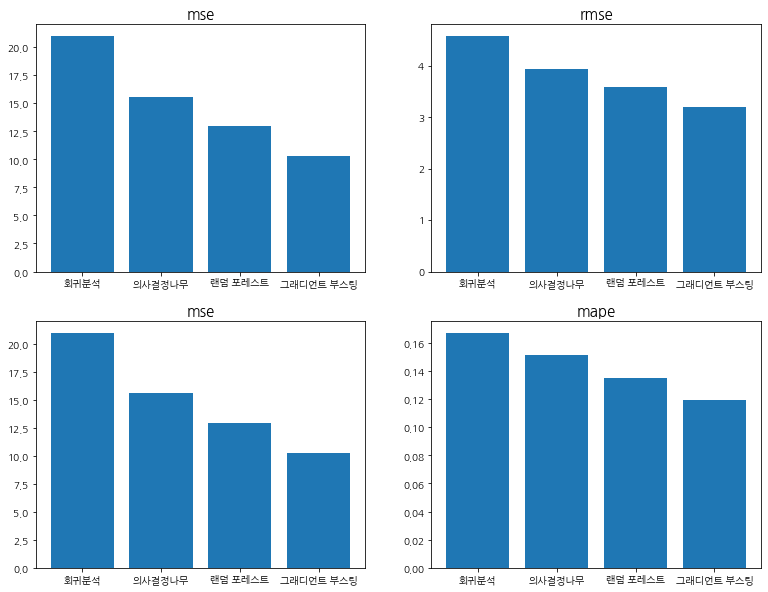

In [19]:
fig,ax=plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mse)
ax[1,0].set_title("mse").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)